<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head1">
    <p style="padding: 6px;
              color:orange;
              text-align:center;
              font-size:100%;">
              1. About Dataset
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head1"></a></p>
</h1>
</div>

#### Context
Tệp này đã được sử dụng để áp dụng các thuật toán học máy khác nhau và để so sánh các kết quả khác nhau, lấy ví dụ là tệp khóa học Udemy Machine Learning.

#### Content
Dữ liệu thể hiện thông tin chi tiết về 400 khách hàng của một công ty bao gồm ID (duy nhất), giới tính, độ tuổi của khách hàng và mức lương. Ngoài ra còn có thông tin liên quan đến quyết định mua hàng - liệu khách hàng có quyết định mua sản phẩm cụ thể hay không.

> target = Purchased
> features = User ID, Gender, Age, EstimatedSalary

In [1]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# optional
import warnings
warnings.filterwarnings('ignore')
plt.style.use('_mpl-gallery')

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [3]:
# import dataset
data = pd.read_csv('Customer_Behaviour.csv')
print(f"shape: {data.shape}")
data.head()

shape: (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head2">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              2. Overview of Dataset
    </p>
</h1>
</div>

In [4]:
df = pd.DataFrame(data)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Dựa theo thông tin trên :
- Bộ dữ liệu không có thông tin nào thiếu sót, nó sẽ được kiểm tra ở bên dưới
- Chúng ta có 4 đặc trưng bao gồm: User ID, Gender, Age, EstimatedSalary.
- Mục tiêu là Purchased
- Chúng ta có duy nhất một dữ liệu phân loại là Gender.

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head3">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              3. Preparing Dataset
   </p>
</h1>
</div>

In [6]:
# Check missing value
df.isnull().sum().to_frame('NaN value').T

,User ID,Gender,Age,EstimatedSalary,Purchased
NaN value,0,0,0,0,0


check each columns for detect syntax error or invalid values

In [7]:
# check count of unique values in each columns
for col in df:
    print(f"{col}: {df[col].nunique()}")

User ID: 400
Gender: 2
Age: 43
EstimatedSalary: 117
Purchased: 2


In [8]:
# more details
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [9]:
df.describe(include=[object]).T

,count,unique,top,freq
Gender,400,2,Female,204


 Dựa theo bảng trên: 
 - Độ tuổi giao động từ 16 đến 60 tuổi
 - Mục tiêu bao gồm 2 lớp 1 và 0
 - Số lượng nam giới và nữ giới là gần như bằng nhau
 - Phạm vi của các đặc trưng là rất khác nhau, cần phải chuẩn hóa

Chúng ta không cần đến ID của từng người, nên có thể loại bỏ nó.

In [10]:
# Drop User ID columns
df.drop('User ID', axis=1, inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [11]:
# convert categoriacl feature to numerical:
# only Gender is categorical
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [0, 1])
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


Kiểm tra lại bộ dữ liệu lần cuối

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [13]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head4">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              4. Exploratory Data Analysis (EDA)
    </p>
</h1>
</div>

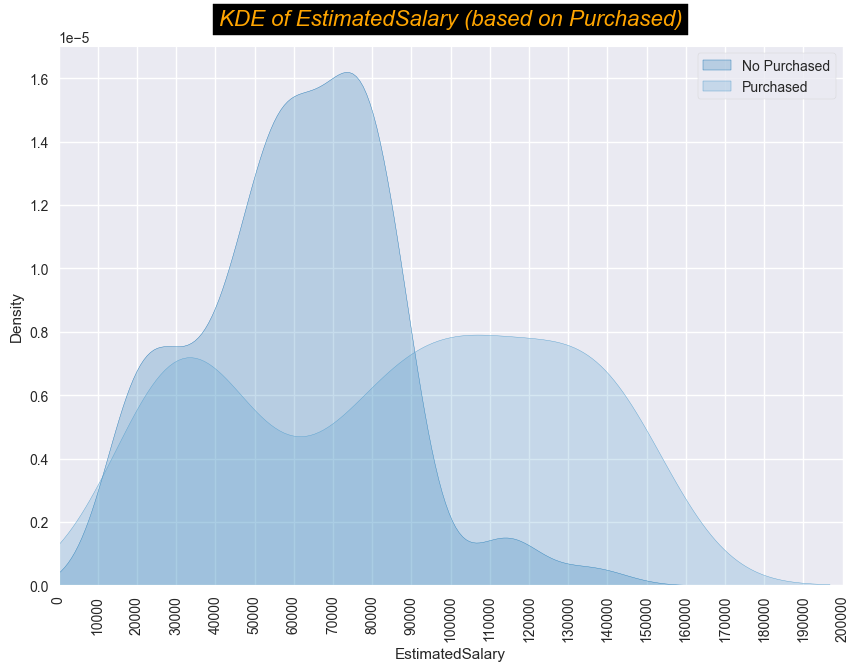

In [14]:
# check distribution of EstimatedSalary (based on Purchased)
font = {'fontsize':16, 'fontstyle':'italic', 'backgroundcolor':'black', 'color':'orange'}
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.kdeplot(df.loc[df['Purchased'] == 0, 'EstimatedSalary'], label='No Purchased', shade=True)
sns.kdeplot(df.loc[df['Purchased'] == 1, 'EstimatedSalary'], label='Purchased', shade=True)
plt.title('KDE of EstimatedSalary (based on Purchased)', fontdict=font, pad=15)
plt.xticks(np.arange(0,200001,10000), rotation=90)
plt.xlim([0,200001])
plt.legend()
plt.show()

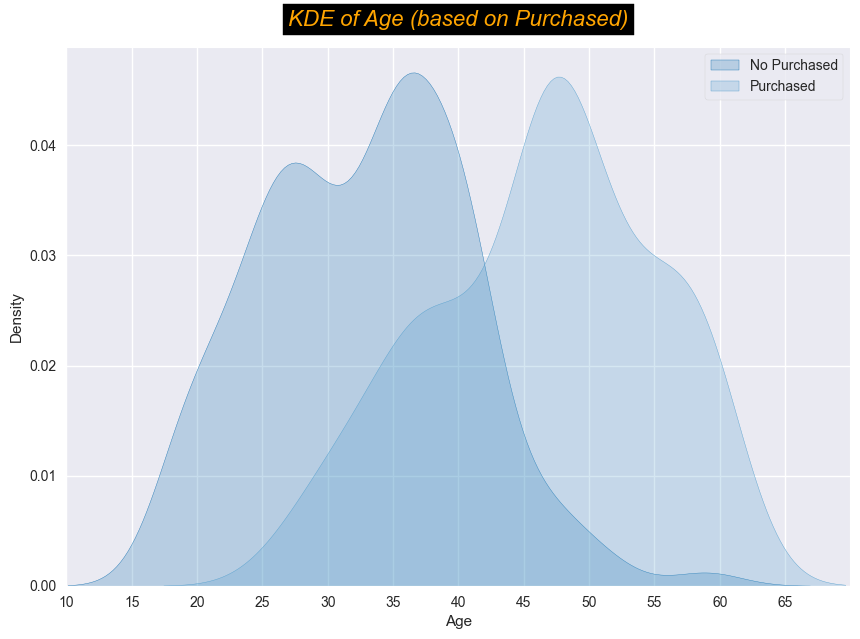

In [15]:
# check distribution of Purchased (based on Purchased)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.kdeplot(df.loc[df['Purchased'] == 0, 'Age'], label='No Purchased', shade=True)
sns.kdeplot(df.loc[df['Purchased'] == 1, 'Age'], label='Purchased', shade=True)
plt.title('KDE of Age (based on Purchased)', fontdict=font, pad=15)
plt.xticks(np.arange(0,70,5))
plt.xlim([10,70])
plt.legend()
plt.show()

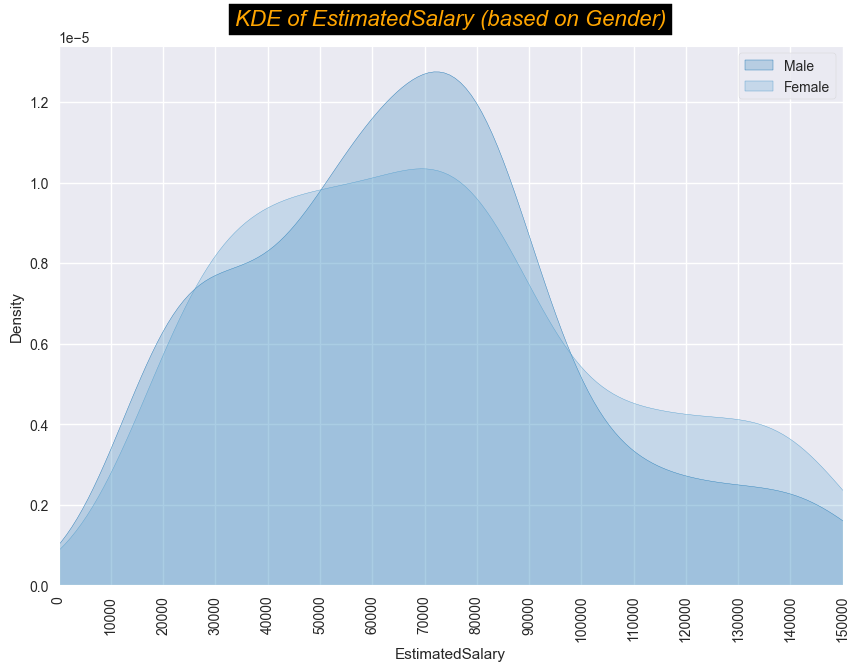

In [16]:
# check distribution of EstimatedSalary (based on Gender)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.kdeplot(df.loc[df['Gender'] == 0, 'EstimatedSalary'], label='Male', shade=True)
sns.kdeplot(df.loc[df['Gender'] == 1, 'EstimatedSalary'], label='Female', shade=True)
plt.title('KDE of EstimatedSalary (based on Gender)', fontdict=font, pad=15)
plt.xticks(np.arange(0,150001,10000), rotation=90)
plt.xlim([0,150001])
plt.legend()
plt.show()

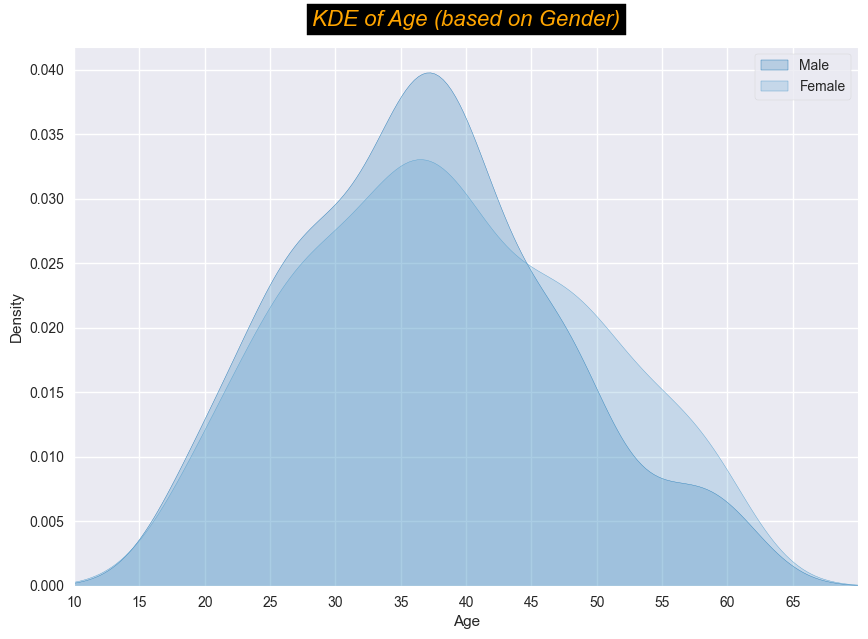

In [17]:
# check distribution of Age (based on Gender)
%matplotlib inline
plt.style.use('seaborn-notebook')
sns.kdeplot(df.loc[df['Gender'] == 0, 'Age'], label='Male', shade=True)
sns.kdeplot(df.loc[df['Gender'] == 1, 'Age'], label='Female', shade=True)
plt.title('KDE of Age (based on Gender)', fontdict=font, pad=15)
plt.xticks(np.arange(0,70,5))
plt.xlim([10,70])
plt.legend()
plt.show()

 Dựa trên các biểu đồ trên: 
 - Hầu như những người có thu nhập từ $40000 đến $90000 không quyết định mua sản phẩm
 - Hầu như những người quyết định mua sản phẩm sẽ lớn tuổi hơn những người quyết định không mua.
 - Những người từ khoảng lớn hơn 43 tuổi thường có hứng thú với sản phẩm. 
 - Dựa trên giới tính cho từng nam và nữ giới thì biểu đồ gần như tương đương. 

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head41">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              4.1. Univariate Analysis
  </p>
</h1>
</div>

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,400.0,0.5100,0.500526,0.0,0.00,1.0,1.0,1.0
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


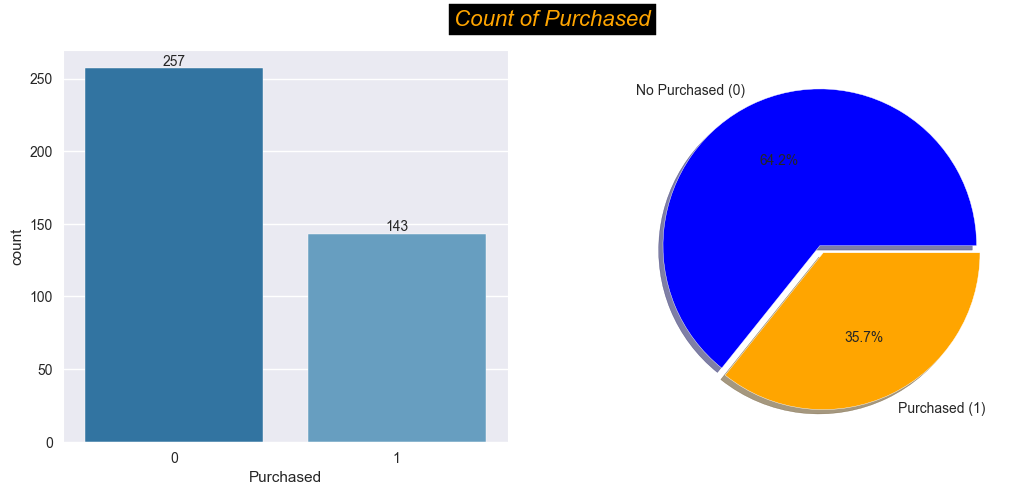

In [19]:
# count based on Purchased (countplot)
fig, axes = plt.subplots(1,2,figsize=(10,4))

sns.countplot(data=df, x='Purchased', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

# count based on Purchased (pie chart)
slices = df.Purchased.value_counts().values
activities = ['No Purchased (0)', 'Purchased (1)']
axes[1].pie(slices, labels=activities, colors=['blue','orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')

plt.suptitle('Count of Purchased', y=1.09, **font)
plt.show()

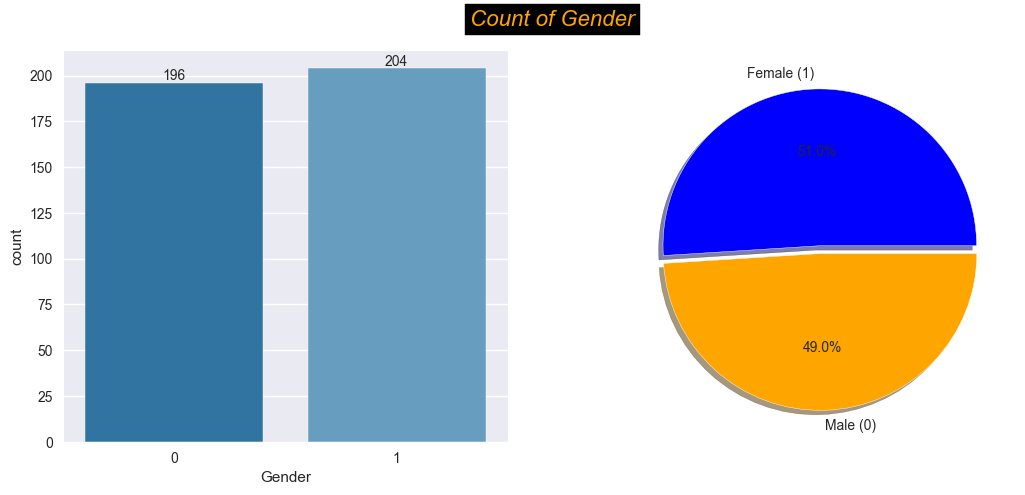

In [20]:
# count based on Gender (countplot)
fig, axes = plt.subplots(1,2,figsize=(10,4))

sns.countplot(data=df, x='Gender', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

# count based on Gender (pie chart)
slices = df.Gender.value_counts().values
activities = ['Female (1)', 'Male (0)']
axes[1].pie(slices, labels=activities, colors=['blue','orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')

plt.suptitle('Count of Gender', y=1.09, **font)
plt.show()

 Dữa trên các biểu đồ và bảng trên: 
 - Số lượng nam và nữ giới là gần như nhau
 - Số lượng người quyết định mua sản phẩm ít hơn số người quyết định không mua sản phẩm. 

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head42">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              4.2. Bivariate Analysis
   </p>
</h1>
</div>

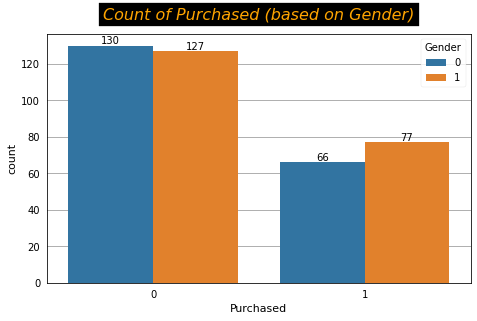

In [22]:
# count of purchased based on Gender
%matplotlib inline
ax = sns.countplot(data=df, x='Purchased', hue='Gender')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of Purchased (based on Gender)', fontdict=font, pad=15)
plt.show()

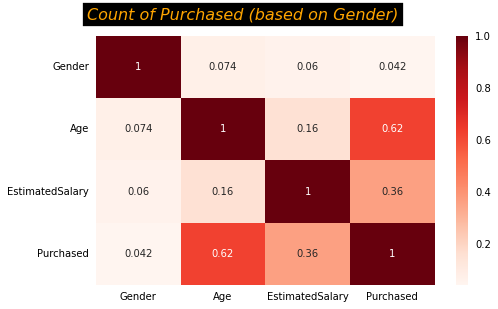

In [23]:
# heatmap
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.suptitle('Count of Purchased (based on Gender)', y=1.09, x=0.35, **font)
plt.show()

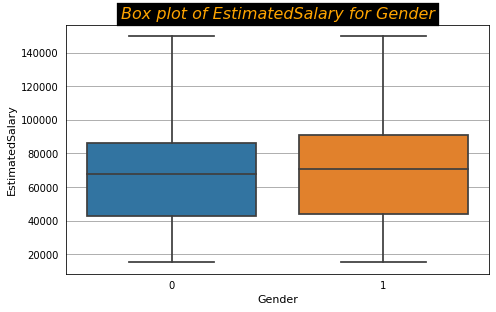

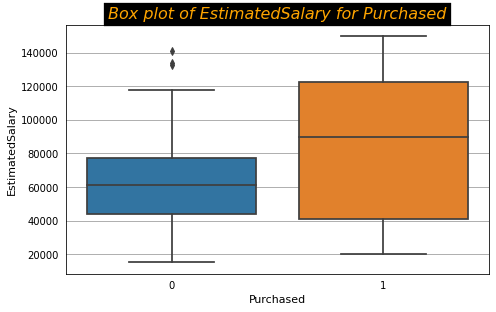

In [24]:
# draw box plot of Estimated salary for male(0) or female(1) Gender
# draw box plot of Estimated salary for no purchased(0) or purchased(1)
for col in ['Gender', 'Purchased']:
    sns.boxplot(data=df, x=col, y='EstimatedSalary')
    plt.title(f'Box plot of EstimatedSalary for {col}', fontdict=font)
    plt.show()

 Dựa trên các biểu đồ trên:
 - Lượng người quyết định mua hàng có nhiều nữ hơn là nam, nhưng lượng người quyết định không mua sản phẩm thì có nhiều nam hơn. 
 - Mối tương quan giữa quyết định mua hàng và độ tuổi là cao nhất (0.62)
 - Mức lương trung bình của những người quyết định mua hàng cao hơn những người quyết định không mua hàng.
 - Mức lương trung bình của nam và nữ không khác biệt nhiều.

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head43">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              4.3. Multivariate Analysis
    <a class="anchor-link" href="https://www.kaggle.com/arezalo/customer-behaviour-prediction-naive-bayes#head43">¶</a></p>
</h1>
</div>



Chúng ta sử dụng biểu đồ phân tán để kiểm tra dữ liệu. 

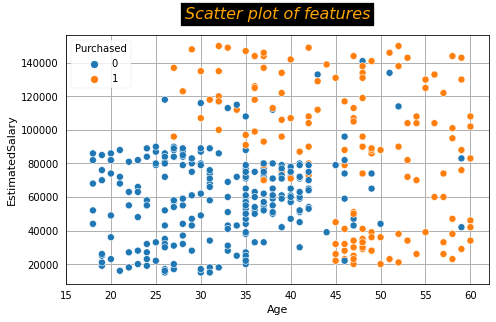

In [25]:
%matplotlib inline
# check feature correlation
sns.scatterplot(data=df,x='Age', y='EstimatedSalary', hue='Purchased',)
plt.title('Scatter plot of features', y=1.04, fontdict=font)
plt.xticks(np.arange(15,65,5))
plt.show()

Để rõ hơn, chung ta sử dụng biểu đồ phân tán 3d

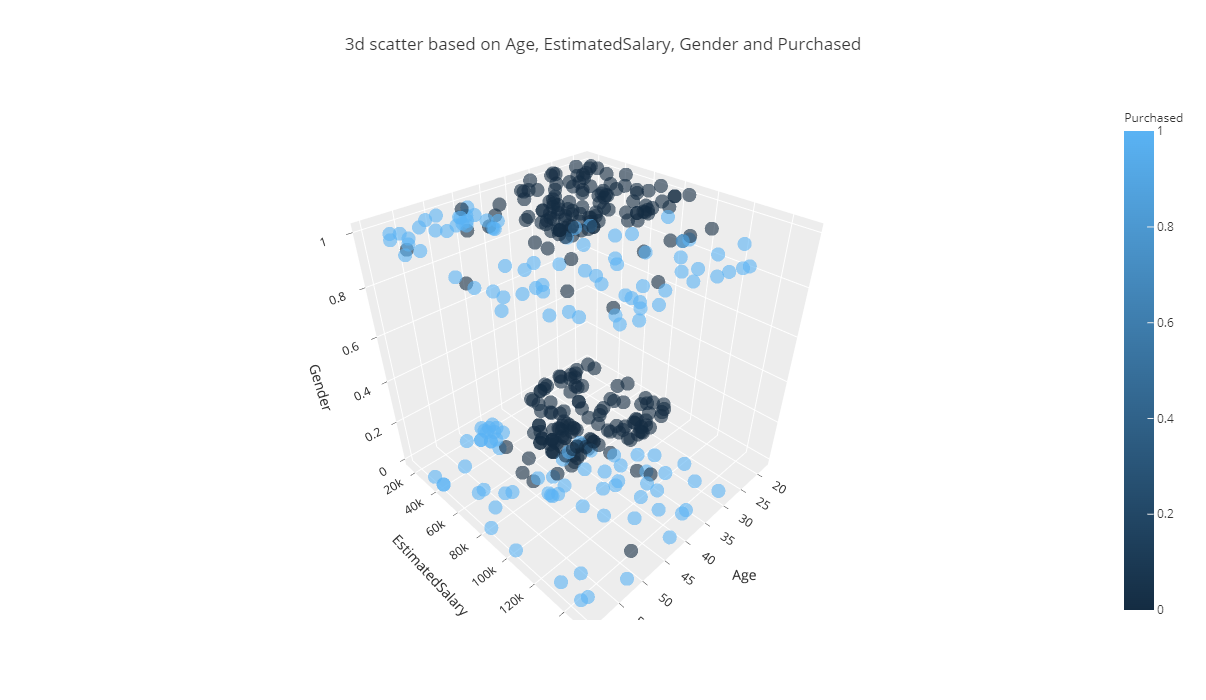

In [26]:
fig = px.scatter_3d(
        data_frame=df,
        x='Age',
        y='EstimatedSalary',
        z='Gender',
        color='Purchased',
        template='ggplot2',
        opacity=0.6,
        height=700,
        title=f'3d scatter based on Age, EstimatedSalary, Gender and Purchased'
)

pio.show(fig)

In [27]:
# check mean of EstimatedSalary based on Gender and Purchased
results = pd.pivot_table(data=df, index='Purchased', columns='Gender', values='EstimatedSalary')
results.style.background_gradient(cmap='summer_r')

Gender,0,1
Purchased,,
0,59630.769231,61480.314961
1,83424.242424,88714.285714


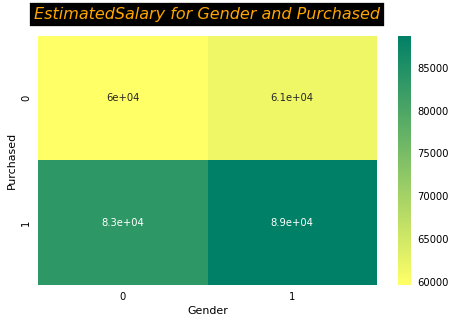

In [28]:
# show result in heatmap
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('EstimatedSalary for Gender and Purchased', y=1.09, x=0.4, **font)
plt.show()

In [29]:
# check mean of Age based on Gender and Purchased
results = pd.pivot_table(data=df, index='Purchased', columns='Gender', values='Age')
results.style.background_gradient(cmap='summer_r')

Gender,0,1
Purchased,,
0,32.484615,33.110236
1,45.500000,47.155844


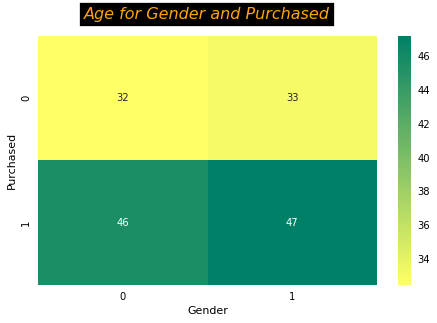

In [30]:
# show result in heatmap
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('Age for Gender and Purchased', y=1.09, x=0.4, **font)
plt.show()

These plots also confirm the previous results
Dựa trên các biểu đồ trên:
- Những người trẻ tuổi và có mức lương thấp thường không mua hàng.
- Những người có mức lương cao hơn $100000, bất kể tuổi tác, thường quyết định mua hàng.
- Những người lớn hơn 45 tuổi, bất kể mức lương đều sẽ mua hàng.
Những biểu đồ này đã xác nhận kết quả bên trên. 

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head5">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              5. Model
</p>
</h1>
</div>

In [31]:
# Our dataset we use for modeling
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


Như chúng ta thấy, cả hai loại dữ liệu rời rạc và liên tục đều có thể được nhìn thấy trong tập dữ liệu, vì vậy trong số các loại Naive Bayes, ta sử dụng Multinomial Naive Bayes.
Vì phạm vi đặc trưng rất khác nhau, như đã đề cập trước đó, nên chúng cần được chuẩn hóa trước.

In [32]:
# standardize EstimatedSalary and Age with StandardScaler
df2 = df.copy()
scaler = MinMaxScaler(feature_range=(18,60)).fit(df[['EstimatedSalary']])
df2['EstimatedSalary'] = scaler.transform(df2['EstimatedSalary'].values.reshape(-1,1))
df2

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19.244444,0
1,0,35,19.555556,0
2,1,26,26.711111,0
3,1,27,31.066667,0
4,0,19,36.977778,0
...,...,...,...,...
395,1,46,26.088889,1
396,0,51,20.488889,1
397,1,50,19.555556,1
398,0,36,23.600000,0


In [34]:
# define x (features) and y (target)
x = np.asanyarray(df2.drop('Purchased', axis=1))
y = df2.Purchased.values.reshape(-1,1)

In [21]:
FPR1 = []
TPR1 = []
FPR0 = []
TPR0 = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes in our target
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt ='d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: logistic model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = KFold(n_splits=k)
    cv_results = cross_val_score(model, x, y, cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

def plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR0(list): list of False Positive Rate for class 0
        TPR0(list): list of True Positive Rate for class 0
        FPR1(list): list of Flase Positive Rate for class 1
        TPR1(list): list of True Positive Rate for class 1
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models 
    """
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    # plot model evaluation
    ax[0].set_title('Model Evaluation Results', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'accoracy': ACC_test, 'Recall': Recall,
                                    'Precision': Precision, 'F1 score': F1}), 
                                    markers=True, ax=ax[0])
    ax[0].set_xlabel('M')
    ax[0].set_ylabel('Evaluation')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)

    # plot model evaluation
    ax[1].set_title('Model Accuracy Results for train and test', fontdict=font, y=1.02)
    sns.lineplot(data=pd.DataFrame({'test accuracy': ACC_test, 'train accuracy': ACC_train}), 
                                    markers=True, ax=ax[1])
    ax[1].set_xlabel('M')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)
    plt.show()

    # plot ROC curve for class 1
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    i=1
    ax[0].set_title('ROC Curve of Class 1', fontdict=font, y=1.02)
    for fpr , tpr in zip(FPR1, TPR1):
        ax[0].plot(fpr, tpr, label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[0].set_xlabel('FPR')
        ax[0].set_ylabel('TPR')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True)
        
    # plot ROC curve for class zero
    i=1
    ax[1].set_title('ROC Curve of Class 0', fontdict=font, y=1.02)
    for fpr , tpr in zip(FPR0, TPR0):
        ax[1].plot(fpr, tpr, '--', label=f"ROC curve of model{i} (AUC = {round(metrics.auc(fpr, tpr),3)})")
        i += 1
        ax[1].set_xlabel('FPR')
        ax[1].set_ylabel('TPR')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
        fancybox=True, shadow=True)
    
    plt.show()

# --------------------------------------------------------------------------------------

def modeling(x, y, test_size, classes, is_add=1 ):

    # split data to train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")
    


    # define model and fit model
    clf = MultinomialNB()
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)

    cm = metrics.confusion_matrix(y_test, y_pred_test)
    fpr1, tpr1, _ = metrics.roc_curve(y_test, y_proba_test[:,1])
    fpr0, tpr0, _ = metrics.roc_curve(y_test, y_proba_test[:,0])
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    rec = metrics.recall_score(y_test, y_pred_test)
    pre = metrics.precision_score(y_test, y_pred_test)
    f1 = metrics.f1_score(y_test, y_pred_test)

    # append results
    if is_add == 1:
        FPR0.append(fpr0)
        TPR0.append(tpr0)
        FPR1.append(fpr1)
        TPR1.append(tpr1)
        ACC_test.append(acc_test)
        ACC_train.append(acc_train)
        Recall.append(rec)
        Precision.append(pre)
        F1.append(f1)

    plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(metrics.classification_report(y_test, y_pred_test, target_names=classes), '\n')
    print(f"Jaccard Score: {metrics.jaccard_score(y_test, y_pred_test)}", '\n')

    # print other result about predicted data
    return clf, acc_test, acc_train

In [22]:
# Now create first model
clf1, acc_test1, acc_train1 = modeling(x, y, 0.2, ['No Purchased=0', 'Purchased=1'])

NameError: name 'x' is not defined

Accuracy là 0.78 và nó cũng không tệ, nhưng mà chúng ta cần cải tiến nó. 

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head6">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              5. Improve Model
</p>
</h1>
</div>

Đầu tiên kiểm tra lại với vài test_size để cải thiện model

-------------------- Shape --------------------
x_train: (280, 3)
y_train: (280, 1)
x_test: (120, 3)
y_test: (120, 1)


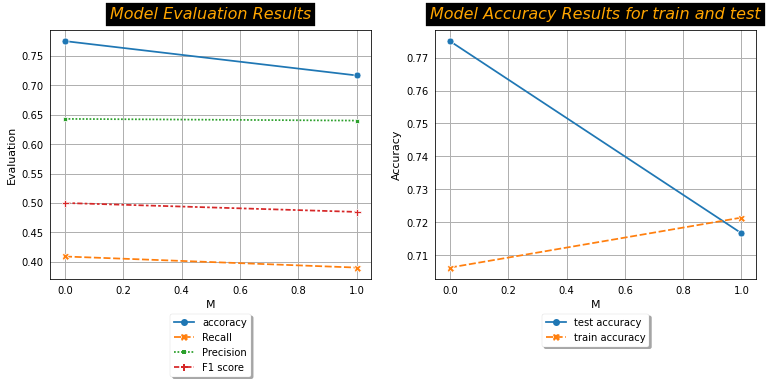

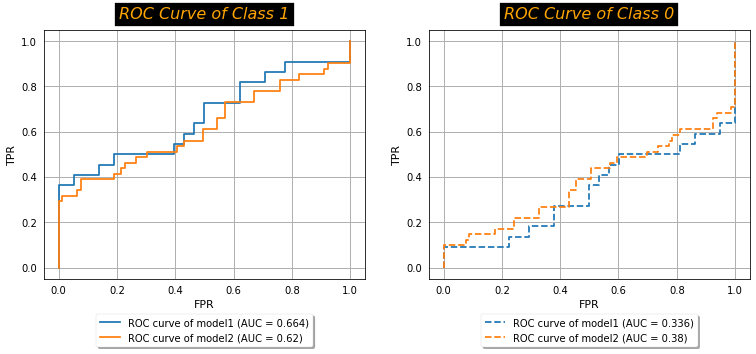

-------------------- Confusion Matrix --------------------
[[70  9]
 [25 16]]


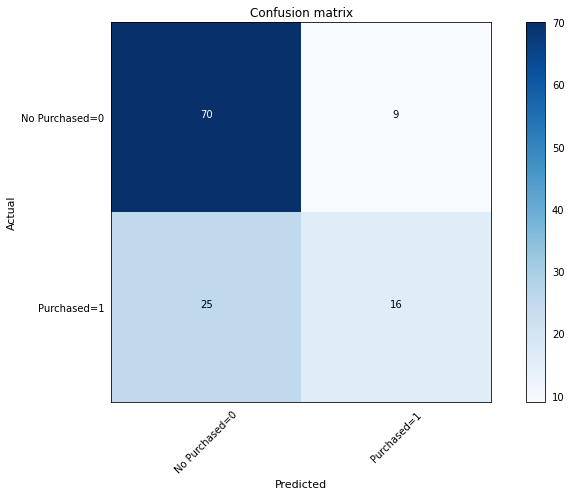

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.74      0.89      0.80        79
   Purchased=1       0.64      0.39      0.48        41

      accuracy                           0.72       120
     macro avg       0.69      0.64      0.64       120
  weighted avg       0.70      0.72      0.70       120
 

Jaccard Score: 0.32 


In [37]:
# test test_size= 0.3
clf2, acc_test2, acc_train2 = modeling(x, y, 0.3, ['No Purchased=0', 'Purchased=1'])

test_size = 0.3 không cải thiện được hiệu suất của model

-------------------- Shape --------------------
x_train: (340, 3)
y_train: (340, 1)
x_test: (60, 3)
y_test: (60, 1)


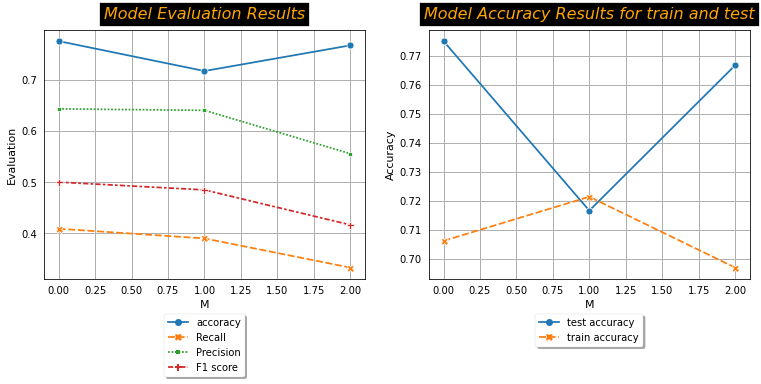

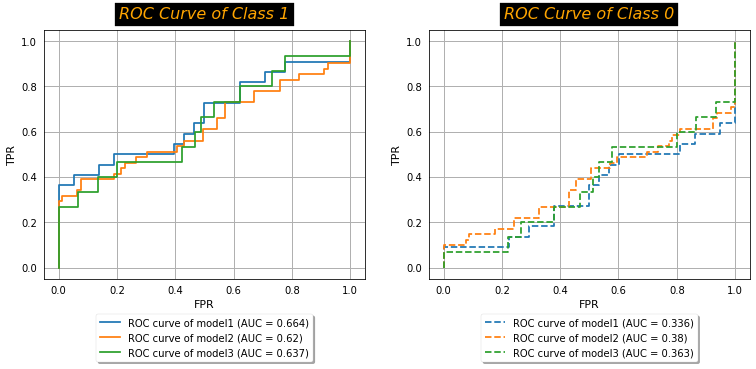

-------------------- Confusion Matrix --------------------
[[41  4]
 [10  5]]


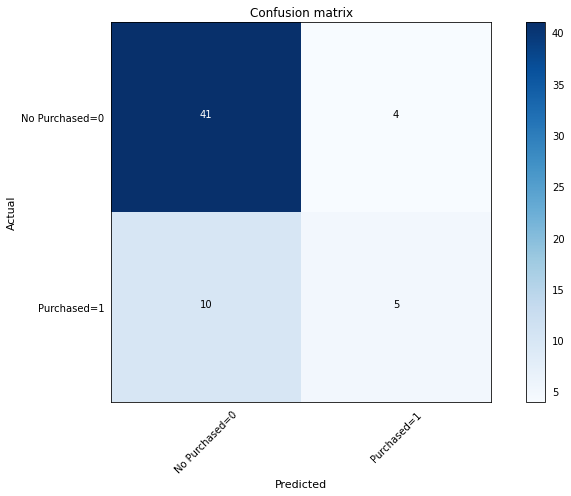

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.80      0.91      0.85        45
   Purchased=1       0.56      0.33      0.42        15

      accuracy                           0.77        60
     macro avg       0.68      0.62      0.64        60
  weighted avg       0.74      0.77      0.74        60
 

Jaccard Score: 0.2631578947368421 


In [38]:
# test test_size= 0.15
clf3, acc_test3, acc_train3 = modeling(x, y, 0.15, ['No Purchased=0', 'Purchased=1'])

test_size = 0.15 không cải thiện được hiệu suất của model

-------------------- Shape --------------------
x_train: (360, 3)
y_train: (360, 1)
x_test: (40, 3)
y_test: (40, 1)


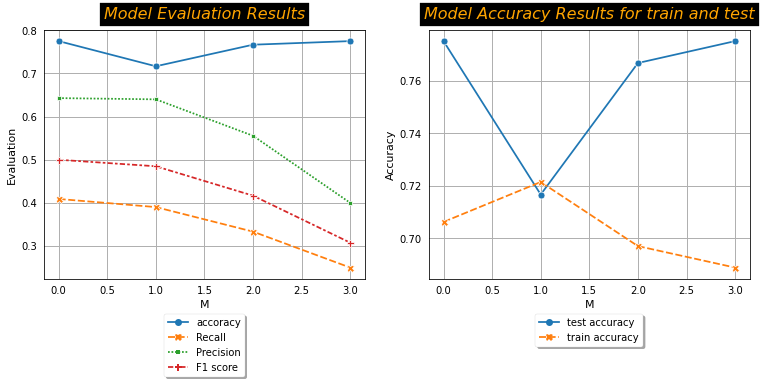

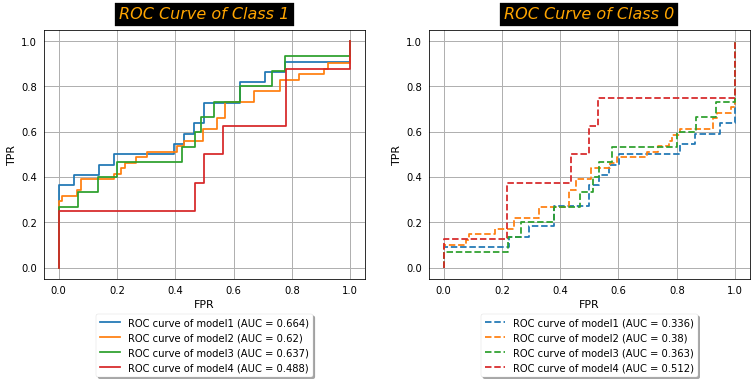

-------------------- Confusion Matrix --------------------
[[29  3]
 [ 6  2]]


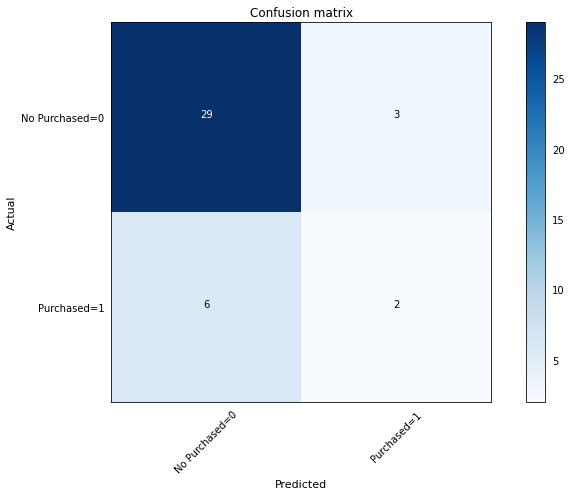

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.83      0.91      0.87        32
   Purchased=1       0.40      0.25      0.31         8

      accuracy                           0.78        40
     macro avg       0.61      0.58      0.59        40
  weighted avg       0.74      0.78      0.75        40
 

Jaccard Score: 0.18181818181818182 


In [39]:
# test test_size= 0.1
clf3, acc_test3, acc_train3 = modeling(x, y, 0.1, ['No Purchased=0', 'Purchased=1'])

test_size = 0.1 không cải thiện hiệu suất của model  
Cho nên chúng ta xóa đi 3 kết quả vì nó không cải thiện được hiệu suất của model

In [40]:
# delete 3 last results
del FPR1[1:]
del TPR1[1:]
del FPR0[1:]
del TPR0[1:]
del ACC_test[1:]
del ACC_train[1:]
del Recall[1:]
del Precision[1:]
del F1[1:]

test_size=0.2 có cải thiện hơn chút và thay đổi tham số này không làm thay đổi hiệu suất của model  
Cho nên chúng ta cải thiện model này bằng Cross Validation với hàm `Perform_cross_val` 

In [41]:
Perform_cross_val(clf1, 10, x, y, scoring='accuracy')

-------------------- CV for k=10, scoring=accuracy --------------------
CV mean: 0.6399999999999999
CV results: [0.925 0.825 0.8   0.7   0.85  0.4   0.5   0.55  0.6   0.25 ]


Folds 6 and 10 are more different from the average than other folds. Therefore, maybe by removing them, the model will be better:


In [42]:
# first find index of datapoint in fold 1 and 3 by following func:
find_fold_index(10, x)

fold 1: [0,39]
--------------------
fold 2: [40,79]
--------------------
fold 3: [80,119]
--------------------
fold 4: [120,159]
--------------------
fold 5: [160,199]
--------------------
fold 6: [200,239]
--------------------
fold 7: [240,279]
--------------------
fold 8: [280,319]
--------------------
fold 9: [320,359]
--------------------
fold 10: [360,399]
--------------------


Xóa đi index `[200-239] , [360-399]`

In [43]:
# delete above index from df2
df3 = df2.drop(df2.index[np.r_[200:239+1, 360:399+1]], axis=0)
print(f'df2:{df2.shape}')
print(f'df3:{df3.shape}')

df2:(400, 4)
df3:(320, 4)


In [44]:
# define new x and y 
x2 = np.asanyarray(df3.drop('Purchased', axis=1))
y2 = df3.Purchased.values.reshape(-1,1)

-------------------- Shape --------------------
x_train: (256, 3)
y_train: (256, 1)
x_test: (64, 3)
y_test: (64, 1)


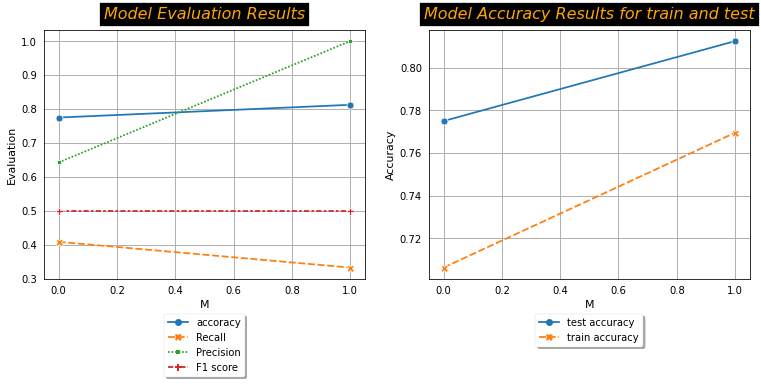

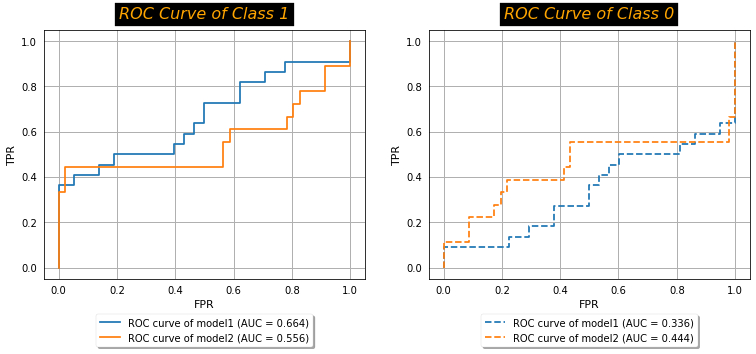

-------------------- Confusion Matrix --------------------
[[46  0]
 [12  6]]


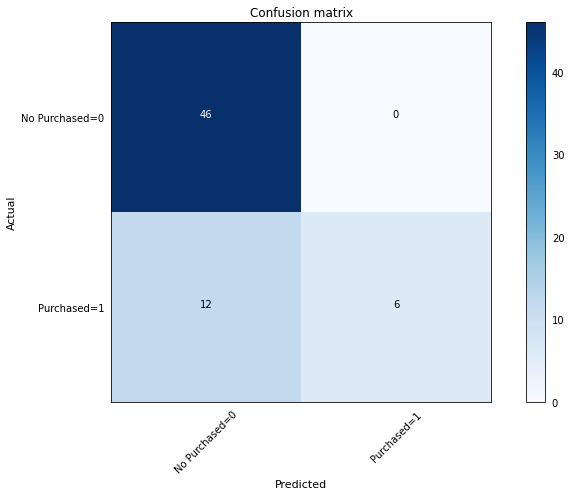

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.79      1.00      0.88        46
   Purchased=1       1.00      0.33      0.50        18

      accuracy                           0.81        64
     macro avg       0.90      0.67      0.69        64
  weighted avg       0.85      0.81      0.78        64
 

Jaccard Score: 0.3333333333333333 


In [45]:
clf2, acc_test2, acc_train2 = modeling(x2, y2, 0.2, classes=['No Purchased=0', 'Purchased=1'])

Bây giờ hiệu suất của mô hình đã được cải thiện và đạt độ chính xác 0,81.  
Như thể hiện trong confusion matrix và báo cáo classification, do thiếu dữ liệu ở lớp 1 nên độ chính xác của lớp này thấp và 12 người quyết định mua hàng đã bị dự đoán sai là lớp 0.  Tuy nhiên, độ chính xác đạt được là tốt.

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head7">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              7. Visualization Final Model
</p>
</h1>
</div>

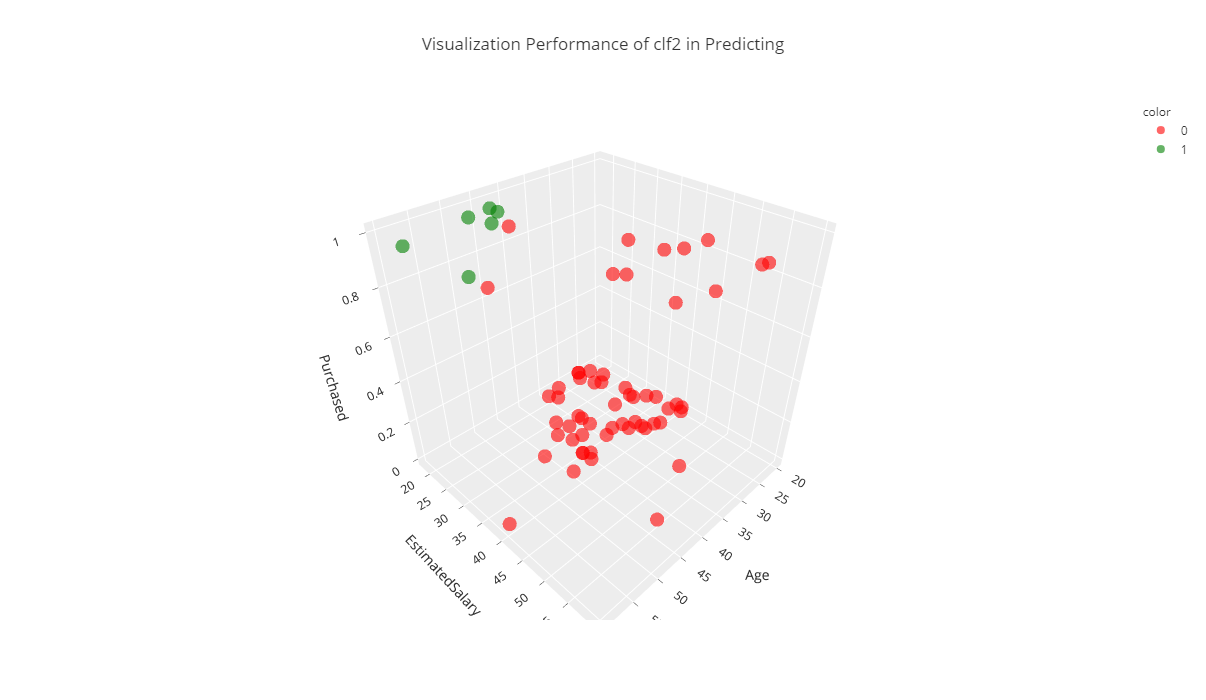

In [46]:
%matplotlib inline
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
x_test = np.concatenate((x_test, y_test), axis=1)
x_test = pd.DataFrame(x_test, columns=['Gender', 'Age', 'EstimatedSalary', 'Purchased'])

fig = px.scatter_3d(
    data_frame= x_test,
    x=x_test.Age,
    y=x_test.EstimatedSalary,
    z=x_test.Purchased,
    color=clf2.predict(x_test.drop('Purchased', axis=1)).astype(str),
    color_discrete_sequence={0:'red', 1:'green'},
    template='ggplot2',
    opacity=0.6,
    height=700,
    title=f'Visualization Performance of clf2 in Predicting')

pio.show(fig)

In [47]:
clf2.predict(x_test.drop('Purchased', axis=1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Trong hình vẽ ở trên, có thể thấy rất rõ rằng ở dưới cùng của khối, nơi tất cả dữ liệu được dự đoán chính xác và tất cả đều có màu đỏ, nhưng ở trên cùng của khối, nơi tất cả các vòng tròn phải có màu xanh lá cây, cũng có thể nhìn thấy các vòng tròn màu đỏ, đó cho thấy dự đoán sai.

<div style="color:orange;
           display:fill;
           border-radius:5px;
           font-family:Verdana;
           letter-spacing:0.5px;
           background-color:black;
            text-align:center;
            padding: 1px;">

<h1 id="head8">
    <p style="padding: 6px;
              font-size:100%;
              color:orange;
              text-align:center;">
              8. Predict Sample Data
</p>
</h1>
</div>

In [48]:
# fit final model on all of data (train + test)
final_model = MultinomialNB()
final_model.fit(x2, y2)

# new sample data
new_sample = pd.DataFrame({'Gender': [1], 'Age': [18], 'EstimatedSalary': [70000]})
print(f"Gender: {new_sample['Gender'].values[0]}\n"
      f"Age: {new_sample['Age'].values[0]}\n"
      f"EstimatedSalary: {new_sample['EstimatedSalary'].values[0]}")

# Satandardize new_sample by use scaler
new_sample['EstimatedSalary'] = scaler.transform(new_sample[['EstimatedSalary']])
ns = np.asanyarray(new_sample)

# predict new sample data
result = final_model.predict(ns)
print('='*38)
print(f"class {result}")


Gender: 1
Age: 18
EstimatedSalary: 70000
class [0]
